Name: Arijit Roy Chowdhury
    
Email: rc.arijit@gmail.com
    
Role: Data Scientist

# Missing / Null Value Check and Treatment

As with many things in machine learning, there are no hard answers for how to treat missing data. Also, missing data could
represent different situations. Imagine census data coming back and an age feature being reported as missing. Is it because
the sample didn’t want to reveal their age? They didn’t know their age? The one asking the questions forgot to even ask
about age? Is there a pattern to missing ages? Does it correlate to another feature? Is it completely random?
There are also various ways to handle missing data:

• Remove any row with missing data

• Remove any column with missing data

• Impute missing values

• Create an indicator column to signify data was missing

# Import Libraries

In [1]:
import time
import random
import pandas as pd
import pandas_profiling as pp
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 200) 

In [2]:
# Read the CSV File using Pandas and store it as a dataframe 'df':

df = pd.read_csv('Dataset/admission_data.csv')
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,324.0,NaN,NaN,4.0,4.5,NaN,1.0,0.76
2,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,NaN,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,314.0,103.0,2.0,2.0,NaN,8.21,0.0,0.65


In [3]:
# Check the column names
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
df.shape
# Insights: The dataset has 500 rows and 8 columns

(500, 8)

In [5]:
df.info()

# Insights: There are 8 float type variable columns and no categorical column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          494 non-null    float64
 1   TOEFL Score        489 non-null    float64
 2   University Rating  491 non-null    float64
 3   SOP                492 non-null    float64
 4   LOR                191 non-null    float64
 5   CGPA               453 non-null    float64
 6   Research           494 non-null    float64
 7   Chance of Admit    500 non-null    float64
dtypes: float64(8)
memory usage: 31.4 KB


In [6]:
# 'University Rating', 'SOP' and 'Research' columns are Ordinal columns. Hence convert their datatype from float to object:

df[['University Rating', 'SOP', 'Research']] = df[['University Rating', 'SOP', 'Research']].astype(object)

In [7]:
# Statistical Description of all Numerical Columns
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,494.000000,489.000000,491.000000,492.000000,191.000000,453.000000,494.000000,500.00000
mean,316.487854,107.179959,3.109980,3.373984,3.520942,8.574283,0.556680,0.72174
std,11.304510,6.051040,1.142912,0.989957,0.963590,0.607893,0.497281,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.500000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.120000,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.500000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.97000


# Check for Missing Data

As we know, there are 4 ways of treating missing values:
    
    • Remove any row with missing data

    • Remove any column with missing data

    • Impute missing values

    • Create an indicator column to signify data was missing
    
We will apply each of these methods for different columns

In [8]:
# Replace Missing Values in all columns with NaN (Not a Number), a datatype recognised by Numpy and Pandas
df = df.replace('', np.nan)

In [9]:
# Check for Missing Data

total = df.isnull().sum()
percent = (df.isnull().sum()*100/df.isnull().count())
missing_data = pd.concat([total, percent], axis=1, keys=['No. of Missing Values', 'Percentage of Missing Values'])
missing_data

# Insight: There are some missing values in the dataset, the summary of which is given below. 
#          CGPA column has quite a few missing values, but it's an important column. So we need to impute the missing values
#          LOR Column has more than 60% missing values. So drop the column

,No. of Missing Values,Percentage of Missing Values
GRE Score,6,1.2
TOEFL Score,11,2.2
University Rating,9,1.8
SOP,8,1.6
LOR,309,61.8
CGPA,47,9.4
Research,6,1.2
Chance of Admit,0,0.0


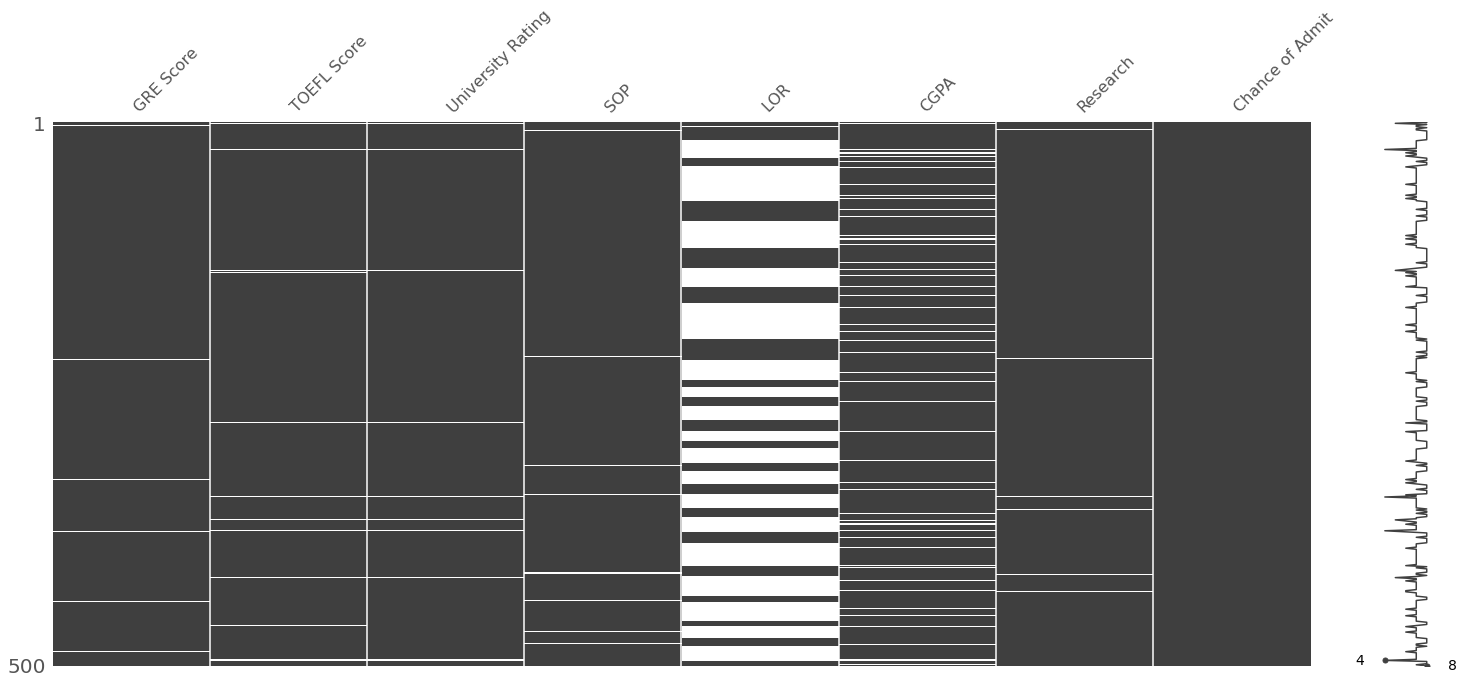

In [10]:
# The below module gives a visualization of missing values in different rows and columns:
import missingno as msno
ax = msno.matrix(df)
# Insights: TOEFL Score and University Rating columns have a few common missing values in the same rows. 
#           So drop rows with 2 or more missing values

In [11]:
df.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,324.0,NaN,NaN,4.0,4.5,NaN,1.0,0.76
2,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,NaN,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,314.0,103.0,2.0,2.0,NaN,8.21,0.0,0.65


# Remove rows with 2 or more missing values

In [12]:
df = df[df.isnull().sum(axis=1) < 2]

In [13]:
# Check for Missing Data after dropping the rows in above cell

total = df.isnull().sum()
percent = (df.isnull().sum()*100/df.isnull().count())
missing_data = pd.concat([total, percent], axis=1, keys=['No. of Missing Values', 'Percentage of Missing Values'])
missing_data

,No. of Missing Values,Percentage of Missing Values
GRE Score,3,0.657895
TOEFL Score,1,0.219298
University Rating,0,0.000000
SOP,6,1.315789
LOR,267,58.552632
CGPA,15,3.289474
Research,4,0.877193
Chance of Admit,0,0.000000


# Remove columns with more than 30% missing values

In [14]:
# Drop columns with > 30% missing values
perc = 30.0 
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df = df.dropna(axis=1, thresh=min_count)

In [15]:
# Check for Missing Data after dropping the columns in above cell

total = df.isnull().sum()
percent = (df.isnull().sum()*100/df.isnull().count())
missing_data = pd.concat([total, percent], axis=1, keys=['No. of Missing Values', 'Percentage of Missing Values'])
missing_data

,No. of Missing Values,Percentage of Missing Values
GRE Score,3,0.657895
TOEFL Score,1,0.219298
University Rating,0,0.000000
SOP,6,1.315789
CGPA,15,3.289474
Research,4,0.877193
Chance of Admit,0,0.000000


In [16]:
# Impute missing values in numerical columns with Median of the particular column:

df[['GRE Score', 'TOEFL Score', 'CGPA']] = df[['GRE Score', 'TOEFL Score', 'CGPA']].fillna(df[['GRE Score', 'TOEFL Score', 'CGPA']].median())

In [17]:
# Impute missing values in categorical columns with Mode of the particular column:
df['University Rating'] = df['University Rating'].fillna(df['University Rating'].mode()[0])
df['SOP'] = df['SOP'].fillna(df['SOP'].mode()[0])
df['Research'] = df['Research'].fillna(df['Research'].mode()[0])

In [18]:
# Check for Missing Data after dropping the columns in above cell

total = df.isnull().sum()
percent = (df.isnull().sum()*100/df.isnull().count())
missing_data = pd.concat([total, percent], axis=1, keys=['No. of Missing Values', 'Percentage of Missing Values'])
missing_data

# Insights: All Missing Values are treated and we are left with a clean dataset

,No. of Missing Values,Percentage of Missing Values
GRE Score,0,0.0
TOEFL Score,0,0.0
University Rating,0,0.0
SOP,0,0.0
CGPA,0,0.0
Research,0,0.0
Chance of Admit,0,0.0


In [19]:
df.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,9.65,1.0,0.92
2,316.0,104.0,3.0,3.0,8.00,1.0,0.72
3,316.0,110.0,3.0,3.5,8.67,1.0,0.80
4,314.0,103.0,2.0,2.0,8.21,0.0,0.65
5,330.0,115.0,5.0,4.5,9.34,1.0,0.90


# Visualize the Data

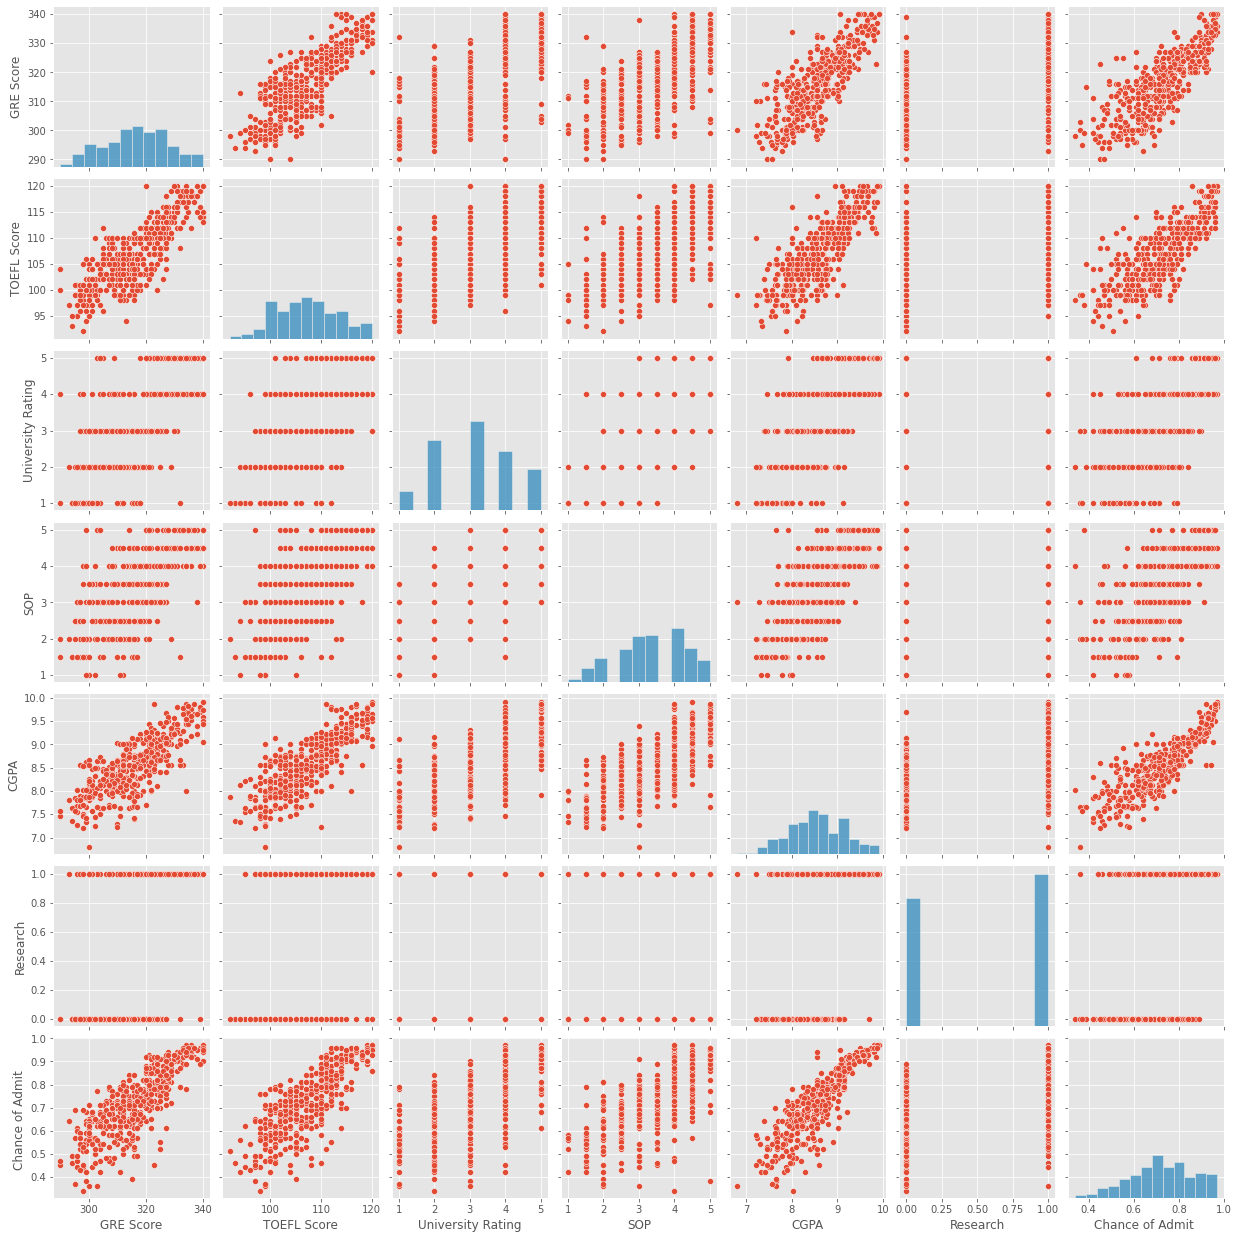

In [22]:
sns.pairplot(df)